In [1]:
import pickle

train_data = pickle.load(open("train_data_with_feats.p","rb"))
test_data = pickle.load(open("test_data_with_feats.p","rb"))

In [2]:
import numpy as np
import pandas as pd 
import scipy.sparse

In [4]:
train =pd.read_csv(r"data\sales_train.csv.gz")
train["count"]=1
grouped = train.groupby(["date","date_block_num","shop_id","item_id"])
train2 = grouped.agg(sum).reset_index()

In [5]:
train.shape

(2935849, 7)

In [13]:
train2.shape

(2935821, 7)

In [30]:
nItems = len(train2.item_id.unique())
nShops = len(train2.shop_id.unique())
nRec = train2.shape[0]


In [31]:
print(nItems)
print(nShops)
print(nRec)

21807
60
2935821


In [36]:
train2["key"]=train2["item_id"] * 10000000 + train2["shop_id"]

In [39]:
len(train2.key.unique())

424124

In [25]:
from matplotlib import pyplot as plt



In [27]:
%matplotlib inline

(array([ 252097.,  478223.,  405580.,  302589.,  215211.,  233455.,
         297930.,  274544.,  239603.,  236589.]),
 array([     0. ,   2216.9,   4433.8,   6650.7,   8867.6,  11084.5,
         13301.4,  15518.3,  17735.2,  19952.1,  22169. ]),
 <a list of 10 Patch objects>)

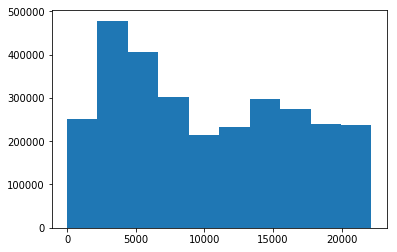

In [29]:
plt.hist(train2.item_id)

(array([ 15.,   5.,  17.,  15.,   1.,   0.,   3.,   0.,   2.,   0.,   0.,
          1.,   0.,   0.,   1.]),
 array([    330.        ,   21026.46666667,   41722.93333333,
          62419.4       ,   83115.86666667,  103812.33333333,
         124508.8       ,  145205.26666667,  165901.73333333,
         186598.2       ,  207294.66666667,  227991.13333333,
         248687.6       ,  269384.06666667,  290080.53333333,  310777.        ]),
 <a list of 15 Patch objects>)

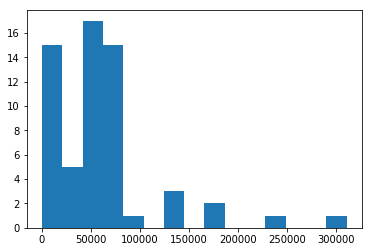

In [56]:
grouped = train.loc[:,["shop_id","item_cnt_day"]].groupby(["shop_id"])
a = grouped.agg(sum).reset_index()
plt.hist(a.item_cnt_day, bins=15)
#np.sort(train2.shop_id.unique())
#grouped = train.groupby(["date","date_block_num","shop_id","item_id"])

In [58]:
a[a["item_cnt_day"]<10000]

,shop_id,item_cnt_day
1,1,6311.0
8,8,3595.0
11,11,572.0
20,20,5872.0
23,23,7705.0
32,32,8781.0
33,33,5482.0
34,34,6451.0
36,36,330.0
40,40,4943.0


In [60]:
len(test_data.item_id.unique())

5100

In [70]:
grouped = train.loc[:,["item_id","shop_id","item_cnt_day"]].groupby(["item_id","shop_id"])
a = grouped.agg(sum).reset_index()

grouped = train.loc[:,["shop_id","item_cnt_day"]].groupby(["shop_id"])
b = grouped.agg(sum).reset_index()

c = pd.merge(a,b,on="shop_id",how="inner")
c["ratio"]=c.item_cnt_day_x/c.item_cnt_day_y
c.sort_values(by=["ratio"], ascending=False)
#plt.hist(a.item_cnt_day, bins=15)

,item_id,shop_id,item_cnt_day_x,item_cnt_day_y,ratio
421578,20949,40,648.0,4943.0,0.131094
414652,20949,39,1867.0,16617.0,0.112355
122546,11373,12,6563.0,73478.0,0.089319
122543,11370,12,6163.0,73478.0,0.083875
421959,20949,11,46.0,572.0,0.080420
225291,20949,28,13458.0,184557.0,0.072921
259334,20949,22,4382.0,60230.0,0.072754
315682,20949,42,10514.0,144934.0,0.072543
133176,20949,14,3219.0,46375.0,0.069412
420441,20949,33,379.0,5482.0,0.069135


In [ ]:
train

In [64]:
test_data[test_data["item_id"]==20949]

,ID,shop_id,item_id,item_category_id,year,sale_month,true_rev_per_day,item_id_shop_id_mon_1_rev_day_mon_1,item_id_shop_id_mon_2_rev_day_mon_2,item_id_shop_id_mon_3_rev_day_mon_3,...,item_category_id_mon_3_rev_day_mon_3,item_category_id_mon_4_rev_day_mon_4,item_category_id_mon_5_rev_day_mon_5,item_category_id_mon_6_rev_day_mon_6,item_category_id_mon_7_rev_day_mon_7,item_category_id_mon_8_rev_day_mon_8,item_category_id_mon_9_rev_day_mon_9,item_category_id_mon_10_rev_day_mon_10,item_category_id_mon_11_rev_day_mon_11,item_category_id_mon_12_rev_day_mon_12
460,460,5,20949,71,2015,34,0.0,1.402824,1.402824,1.402824,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
5560,5560,4,20949,71,2015,34,0.0,1.866661,1.866661,1.866661,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
10660,10660,6,20949,71,2015,34,0.0,1.419084,1.419084,1.419084,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
15760,15760,3,20949,71,2015,34,0.0,1.076139,1.076139,1.076139,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
20860,20860,2,20949,71,2015,34,0.0,1.317301,1.317301,1.317301,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
25960,25960,7,20949,71,2015,34,0.0,1.596015,1.596015,1.596015,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
31060,31060,10,20949,71,2015,34,0.0,0.916291,0.916291,0.916291,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
36160,36160,12,20949,71,2015,34,0.0,0.070580,0.070580,0.070580,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
41260,41260,28,20949,71,2015,34,0.0,2.867899,2.867899,2.867899,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
46360,46360,31,20949,71,2015,34,0.0,3.285911,3.285911,3.285911,...,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438,5.55438
